# Results processing notebook

In [1]:
import os
import re
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
"""
projects =
{
    #project
    'p_de': {
        #data
        'FPS': 90, ...
    }, ...
}
"""

projects = {}

### Encontrar los archivos y llamar a la función

In [13]:
results_folders = os.listdir('./')

for result_folder in results_folders:

    if '.' in result_folder:
        continue
        
    projects[result_folder] = {}

    result_files = os.listdir('./' + result_folder)
    
    for result_file in result_files:
        
        if not '.csv' in result_file:
            continue

        file_path = os.path.join('./' + result_folder, result_file)
        data_name = result_file.split('.')[0]
        
        df = pd.read_csv(file_path, header=None)
        
        value = 0
        if data_name == 'FPS':
            value = df.iloc[:, 0].mean()
        else:
            value = df.iloc[-1, 0]
        
        projects[result_folder][data_name] = value
    
print(projects)

{'different_particles_multi_draw_elements': {'FPS': 119.1193913, 'Time': 10.2186}, 'different_particles_multi_draw_elements_indirect': {'FPS': 243.07089499999998, 'Time': 5.28391}, 'particle_draw_elements': {'FPS': 21.7365219, 'Time': 53.3202}, 'particle_draw_elements_instanced': {'FPS': 237.71980100000002, 'Time': 5.38601}, 'particle_multi_draw_elements': {'FPS': 121.83695780000001, 'Time': 9.99386}, 'particle_multi_draw_elements_indirect': {'FPS': 242.085975, 'Time': 5.32315}}


### Plotting

In [14]:
def to_camel_case(string):
    if 'cles' in string and 'indirect' in string:
        return 'MultiDrawElementsIndirect (Varied)'
    if 'cles' in string:
        return 'MultiDrawElements (Varied)'
    return ''.join(word.capitalize() for word in string.split('_'))

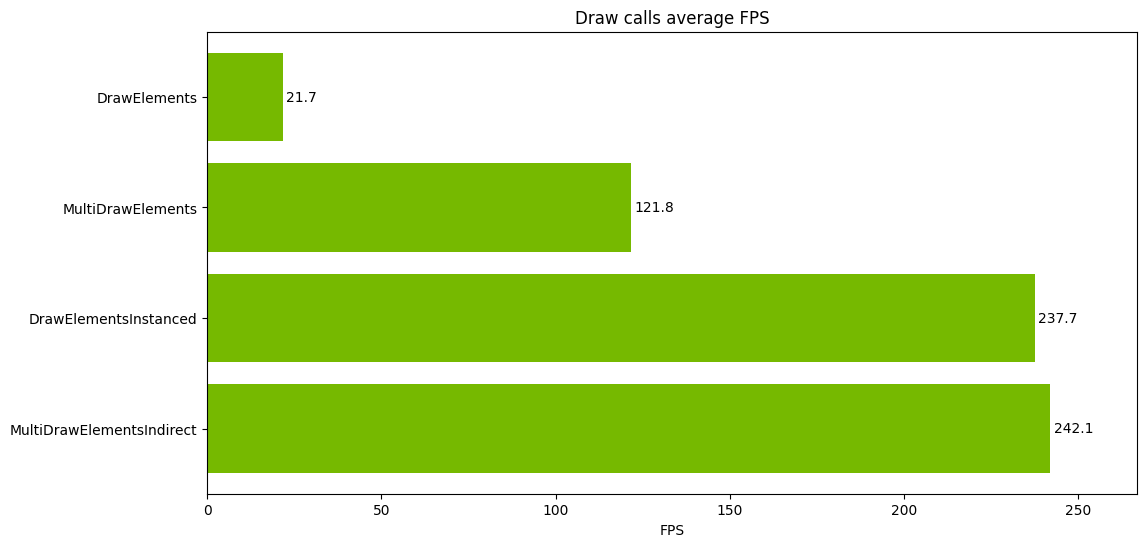

In [26]:
# Extract project names and corresponding FPS values
og_names = list(filter(lambda name: not 'diff' in name, list(projects.keys())))

fps_values = []
for og_name in og_names:
    fps_values.append(projects[og_name]['FPS'])

project_names = [to_camel_case(name[9:]) for name in og_names]

# Sort projects based on FPS values (from fastest to slowest)
sorted_projects = sorted(zip(project_names, fps_values), key=lambda x: x[1], reverse=True)
project_names, fps_values = zip(*sorted_projects)

# Round FPS values to two decimal places
fps_values = [round(value, 1) for value in fps_values]

# Use a colormap for different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(project_names)))

# Plotting the horizontal bar chart for FPS
fig, ax = plt.subplots(figsize=(12, 6))

bars = ax.barh(project_names, fps_values, color='#76b900')
ax.set_xlabel('FPS')
ax.set_title('Draw calls average FPS')

# Adding labels to each bar
for bar, value in zip(bars, fps_values):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{value}', va='center')

# Adjust x-axis limits to prevent wider bars from going beyond the chart
ax.set_xlim(0, max(fps_values) + 25)

plt.show()

#fig.savefig('fps_comparison.jpg')